

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    Choose features other than the ones used in the lesson.
    Visualize the results of your clustering.
    Use the elbow method to visually select a good value for k.
    Repeat the clustering, this time with 3 different features.

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
selected_features = ['sepal length (cm)', 'sepal width (cm)']
X = iris_df[selected_features]

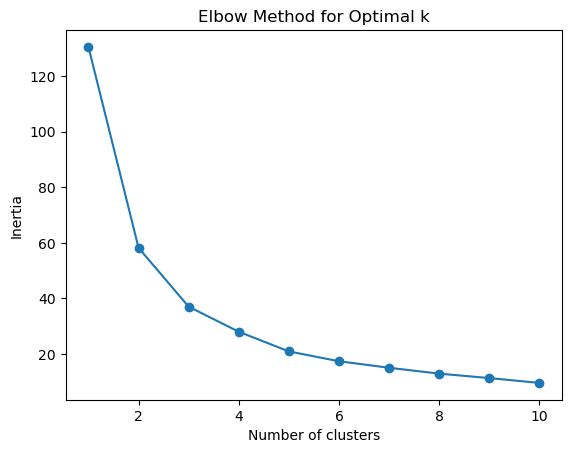

In [3]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

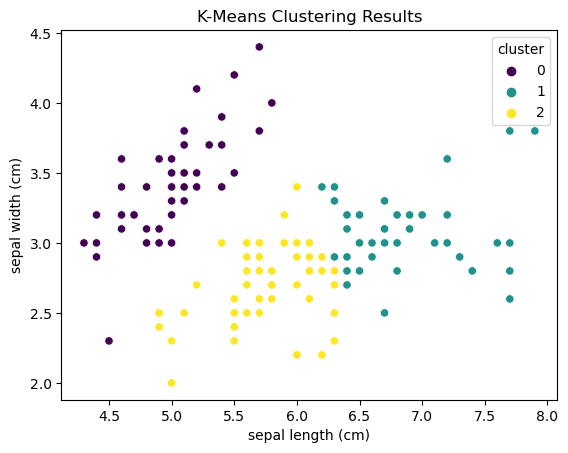

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
iris_df['cluster'] = kmeans.labels_

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', data=iris_df, palette='viridis')
plt.title('K-Means Clustering Results')
plt.show()

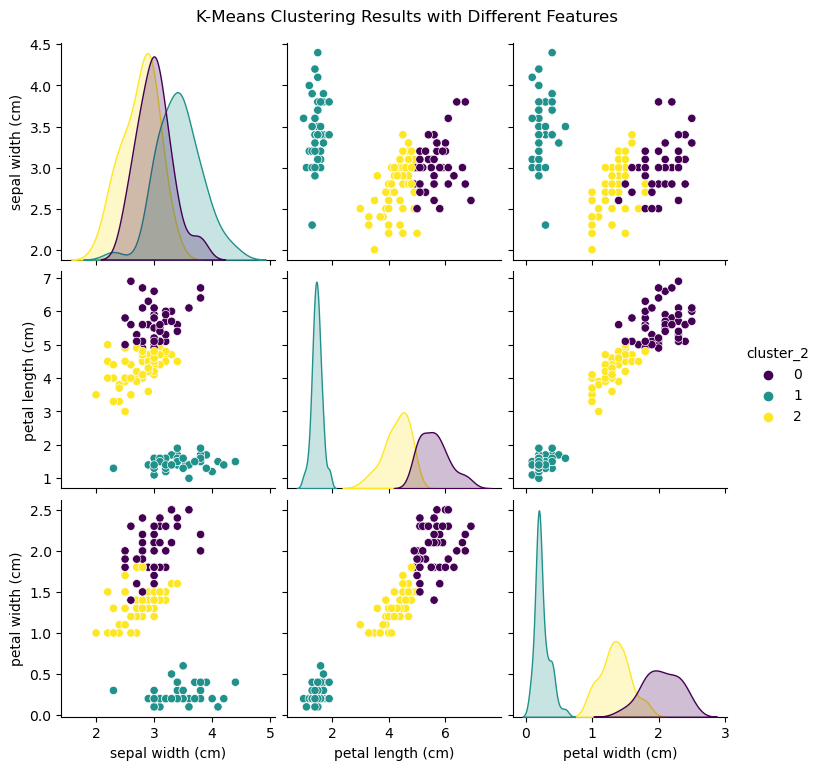

In [5]:
selected_features_2 = ['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X2 = iris_df[selected_features_2]

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(X2)
iris_df['cluster_2'] = kmeans2.labels_

sns.pairplot(iris_df, vars=selected_features_2, hue='cluster_2', palette='viridis')
plt.suptitle('K-Means Clustering Results with Different Features', y=1.02)
plt.show()

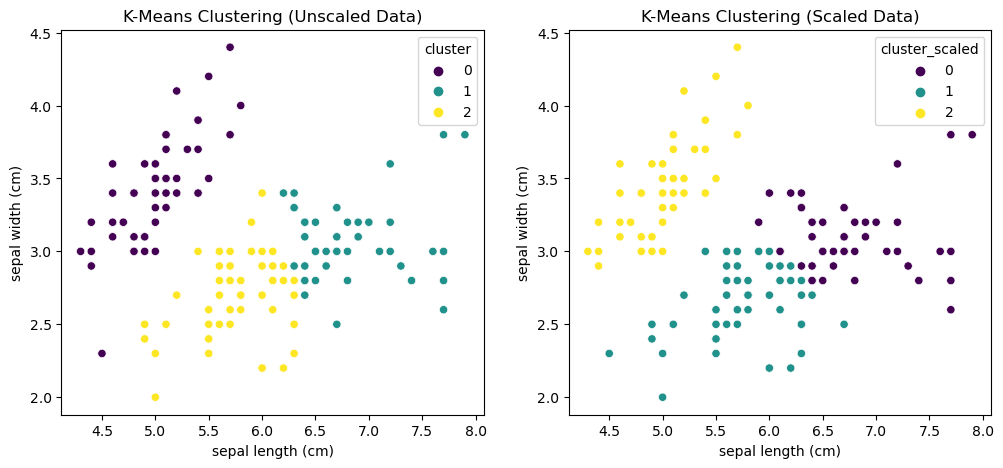

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(X_scaled)
iris_df['cluster_scaled'] = kmeans_scaled.labels_

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster', data=iris_df, palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering (Unscaled Data)')

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='cluster_scaled', data=iris_df, palette='viridis', ax=axes[1])
axes[1].set_title('K-Means Clustering (Scaled Data)')

plt.show()